# Import necessary Librries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import  matplotlib.pyplot as plt


plt.style.use('seaborn')
%matplotlib inline

import scipy.stats as stats
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

#ML Librarires  & import libraries for evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve

from numpy import mean
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/coelcodingchallenge/coel_coding_challenge/CoelCodingChallenge.md
/kaggle/input/coelcodingchallenge/coel_coding_challenge/activity.csv
/kaggle/input/coelcodingchallenge/coel_coding_challenge/target.csv


# Raw_Data Read

In [2]:
raw_df = pd.read_csv('/kaggle/input/coelcodingchallenge/coel_coding_challenge/activity.csv')
raw_df.head()

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1
1,2021-05-11,0032j00000FZcIvAAL,a,1
2,2020-12-09,0032j000002gKM8AAM,a,1
3,2021-03-30,0032j000001UX7cAAG,a,1
4,2020-10-19,0032j000004etUWAAY,a,1


# Target_Data Read

In [3]:
target_df = pd.read_csv('/kaggle/input/coelcodingchallenge/coel_coding_challenge/target.csv')
target_df.head()

,customer,date
0,0032j000001UaIdAAK,2020-11-06
1,0032j000002hwpFAAQ,2021-05-20
2,0032j0000077nwFAAQ,2020-12-18
3,0032j000001UU6aAAG,2020-11-20
4,0032j000001UFAIAA4,2021-02-18


In [4]:
#re-order columns
target_df.set_index(target_df.columns[-1], inplace=True)
target_df.reset_index(inplace=True)

In [5]:
target_df

,date,customer
0,2020-11-06,0032j000001UaIdAAK
1,2021-05-20,0032j000002hwpFAAQ
2,2020-12-18,0032j0000077nwFAAQ
3,2020-11-20,0032j000001UU6aAAG
4,2021-02-18,0032j000001UFAIAA4
...,...,...
4351,2021-05-07,0032j00000BHLtnAAH
4352,2021-04-20,0032j00000FafiJAAR
4353,2021-05-20,0032j000004dfk5AAA
4354,2021-03-12,0032j000002j97vAAA


# Data Pre-Processing & Exploratory Data Analysis(EDA), Feature Engineering,

In [6]:
#missing values cheacking at raw_df

raw_df.apply(lambda x: sum(x.isnull()),axis=0)

date              0
customer          0
activity_type     0
activity_count    0
dtype: int64

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904772 entries, 0 to 904771
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   date            904772 non-null  object
 1   customer        904772 non-null  object
 2   activity_type   904772 non-null  object
 3   activity_count  904772 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 27.6+ MB


In [8]:
raw_df.shape

(904772, 4)

In [9]:
# Merge Raw_df, target_df
df= raw_df.append(target_df)

In [10]:
df

,date,customer,activity_type,activity_count
0,2021-01-20,0032j000002jRYxAAM,a,1.0
1,2021-05-11,0032j00000FZcIvAAL,a,1.0
2,2020-12-09,0032j000002gKM8AAM,a,1.0
3,2021-03-30,0032j000001UX7cAAG,a,1.0
4,2020-10-19,0032j000004etUWAAY,a,1.0
...,...,...,...,...
4351,2021-05-07,0032j00000BHLtnAAH,NaN,NaN
4352,2021-04-20,0032j00000FafiJAAR,NaN,NaN
4353,2021-05-20,0032j000004dfk5AAA,NaN,NaN
4354,2021-03-12,0032j000002j97vAAA,NaN,NaN


In [11]:
#Drop the Customer ID column (unique number)
drop_cols = ['customer'] 
df = df.drop(drop_cols, axis=1)

In [12]:
df

,date,activity_type,activity_count
0,2021-01-20,a,1.0
1,2021-05-11,a,1.0
2,2020-12-09,a,1.0
3,2021-03-30,a,1.0
4,2020-10-19,a,1.0
...,...,...,...
4351,2021-05-07,NaN,NaN
4352,2021-04-20,NaN,NaN
4353,2021-05-20,NaN,NaN
4354,2021-03-12,NaN,NaN


In [13]:
#Missing Values((NaN)) Handalling at Columns : activity_type','activity_count' using Dummy values from pandas data frame

df = pd.get_dummies(df, columns=['activity_type','activity_count'])

In [14]:
df

,date,activity_type_a,activity_type_b,activity_type_c,activity_type_d,activity_type_e,activity_type_f,activity_type_g,activity_type_h,activity_type_i,activity_type_j,activity_type_k,activity_type_l,activity_type_m,activity_type_n,activity_type_o,activity_type_p,activity_type_q,activity_type_r,activity_type_s,activity_type_t,activity_type_u,activity_type_v,activity_type_w,activity_type_x,activity_type_y,activity_count_1.0
0,2021-01-20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2021-05-11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2020-12-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2021-03-30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2020-10-19,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4351,2021-05-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4352,2021-04-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4353,2021-05-20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4354,2021-03-12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 909128 entries, 0 to 4355
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date                909128 non-null  object
 1   activity_type_a     909128 non-null  uint8 
 2   activity_type_b     909128 non-null  uint8 
 3   activity_type_c     909128 non-null  uint8 
 4   activity_type_d     909128 non-null  uint8 
 5   activity_type_e     909128 non-null  uint8 
 6   activity_type_f     909128 non-null  uint8 
 7   activity_type_g     909128 non-null  uint8 
 8   activity_type_h     909128 non-null  uint8 
 9   activity_type_i     909128 non-null  uint8 
 10  activity_type_j     909128 non-null  uint8 
 11  activity_type_k     909128 non-null  uint8 
 12  activity_type_l     909128 non-null  uint8 
 13  activity_type_m     909128 non-null  uint8 
 14  activity_type_n     909128 non-null  uint8 
 15  activity_type_o     909128 non-null  uint8 
 16  acti

In [16]:
df.describe()

,activity_type_a,activity_type_b,activity_type_c,activity_type_d,activity_type_e,activity_type_f,activity_type_g,activity_type_h,activity_type_i,activity_type_j,activity_type_k,activity_type_l,activity_type_m,activity_type_n,activity_type_o,activity_type_p,activity_type_q,activity_type_r,activity_type_s,activity_type_t,activity_type_u,activity_type_v,activity_type_w,activity_type_x,activity_type_y,activity_count_1.0
count,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.00000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000,909128.000000
mean,0.059425,0.033497,0.006726,0.003001,0.000078,0.031683,0.000053,0.056488,0.041862,0.073887,0.00208,0.115833,0.156002,0.073003,0.021249,0.035548,0.000539,0.001135,0.011344,0.024721,0.079274,0.022121,0.020559,0.095927,0.029172,0.995209
std,0.236419,0.179930,0.081737,0.054696,0.008837,0.175155,0.007266,0.230862,0.200274,0.261588,0.04556,0.320025,0.362858,0.260141,0.144213,0.185161,0.023210,0.033673,0.105902,0.155275,0.270166,0.147078,0.141903,0.294491,0.168288,0.069054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization & distribution

In [17]:
df = df
fig = px.pie(df, names='activity_count_1.0',width=1200)
fig.show()

# Feature Selections & Machine Learning Part;

In [18]:
X = np.array(df.drop(['date','activity_count_1.0'], 1)) #choosing X array for Feature Columns
y = np.array(df["activity_count_1.0"]) #Target Column

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [19]:
X 

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
y 

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

# #Using Support Vector Machince (SVM) ML algorithm for Immblance Class distribution dataset

In [21]:
#Spilt  full data into  train 70% & Test 30% for validion 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42) #splittting the data into training and testing data

# PART 1

In [22]:
from collections import Counter

# summarize class distribution
print("Before undersampling: ", Counter(y_train))

# define undersampling strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

Before undersampling:  Counter({1: 633318, 0: 3071})


In [23]:
# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# summarize class distribution
print("After undersampling: ", Counter(y_train_under))

After undersampling:  Counter({0: 3071, 1: 3071})


# PART 2

In [24]:
#Using Support Vector Machince (SVM) ML algorithm
model=SVC()
clf_under = model.fit(X_train_under, y_train_under)
pred_under = clf_under.predict(X_test)

print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))

ROC AUC score for undersampled data:  1.0


# Final Part: 3

In [25]:
# define pipeline for handling Imballance Class distribaution & Prediction using upport Vector Machince (SVM) ML algorithm
model = SVC()
over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# evaluate pipeline
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=5, n_jobs=-1)
score = mean(scores)
print('ROC AUC score for the combined sampling method: %.3f' % score)

ROC AUC score for the combined sampling method: 1.000


# Using PCA analysis &  LogisticRegression  ML Algorithm

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=25)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

In [27]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (636389, 25)
X_test (272739, 25)
y_train (636389,)
y_test (272739,)


In [28]:
def plot_roc_(false_positive_rate,true_positive_rate,roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

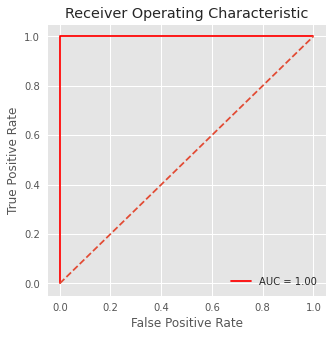

[[  1285      0]
 [     0 271454]]


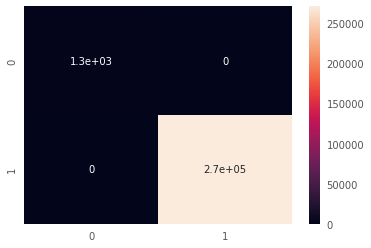

Accurancy Oranı : 1.0
Logistic TRAIN score with  1.0
Logistic TEST score with  1.0



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
# format scoring output
def score_format(model):
    print(f'Accuracy: {round(model * 100, 2)} %')
    
    
lr=LogisticRegression(C=0.1,penalty='l2',random_state=42)
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)


y_proba=lr.predict_proba(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
plot_roc_(false_positive_rate,true_positive_rate,roc_auc)


from sklearn.metrics import r2_score,accuracy_score

cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
#print('Hata Oranı :',r2_score(y_test,y_pred))
print('Accurancy Oranı :',accuracy_score(y_test, y_pred))
print("Logistic TRAIN score with ",format(lr.score(X_train, y_train)))
print("Logistic TEST score with ",format(lr.score(X_test, y_test)))
print()